In [67]:
from importlib import reload ,import_module
import module.utilize as utilize
import module.multiVariant as multiVariant
import module.singleVariant as singleVariant
import module.multiHistogramBase as multiHistogramBase
import numpy as np
from numba import njit,jit, float32
import module.singleVariantCopulaBase as CopulaBase
from tqdm import tqdm
import time

reload(utilize)
reload(multiVariant)
reload(singleVariant)
reload(multiHistogramBase)
reload(CopulaBase)

startTime=time.time()

attribute_names=np.array(["phi_grav",])
incremental_number=100
all_ensamble_data=np.empty([0,incremental_number,64,64,64])

for name in attribute_names:
    data=utilize.readFiles(name,incremental_number)
    data=data.reshape(1,incremental_number,64,64,64)
    all_ensamble_data=np.append(all_ensamble_data,data,axis=0)

#print(all_ensamble_data.shape)
#print(all_ensamble_data[0].shape)
covBlockSize=5
dataBlockSize=5
binsNumber=128
sizeZ=15
sizeY=15
sizeX=15
minMaxBlockSize=2
isMinMax=False

oursModel=multiVariant.multiDistCopula3D(all_ensamble_data,dataBlockSize,covBlockSize,binsNumber,[sizeZ,sizeY,sizeX],minMaxBlockSize,isMinMax)

conditions=np.array([[0,1e5],[3e10,5e10]])
oursModel.fit()
print("ours complete fit")

ours complete fit


In [68]:
phi_model=oursModel.singleDistModels[0]

z=[]
y=[]
x=[]

for i in range(binsNumber):
    pos=phi_model.blocks[0].getMean(i)
    z.append(pos[0])
    y.append(pos[1])
    x.append(pos[2])

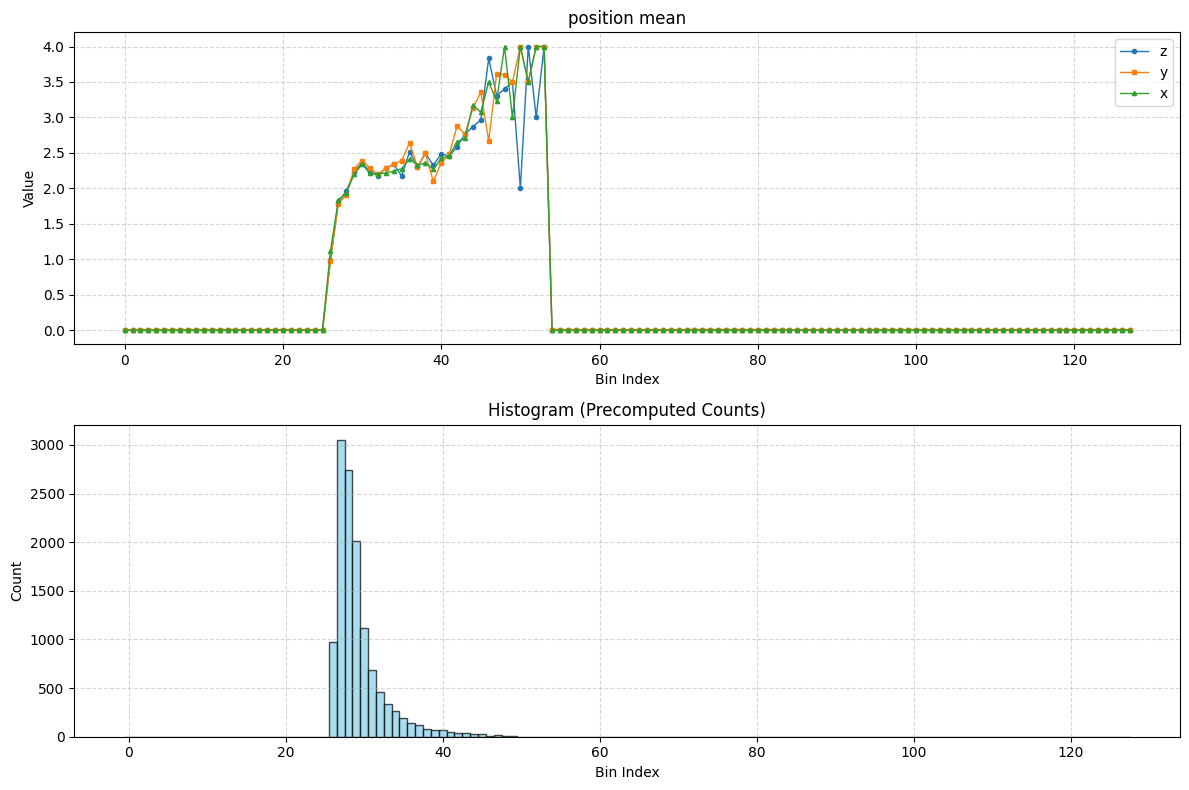

In [69]:
z=np.array(z)
y=np.array(y)
x=np.array(x)

hist=phi_model.blocks[0].hist
import matplotlib.pyplot as plt

# 假設有一個長度 128 的陣列
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(z, label="z", marker='o', markersize=3, linewidth=1)
axes[0].plot(y, label="y", marker='s', markersize=3, linewidth=1)
axes[0].plot(x, label="x", marker='^', markersize=3, linewidth=1)
axes[0].set_title("position mean")
axes[0].set_xlabel("Bin Index")
axes[0].set_ylabel("Value")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)


bin_edges = np.arange(len(hist))  # 這裡假設 bin 是 0,1,2,...127
axes[1].bar(bin_edges, hist, width=1.0, color="skyblue", edgecolor="black", alpha=0.7)
axes[1].set_title("Histogram (Precomputed Counts)")
axes[1].set_xlabel("Bin Index")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

6


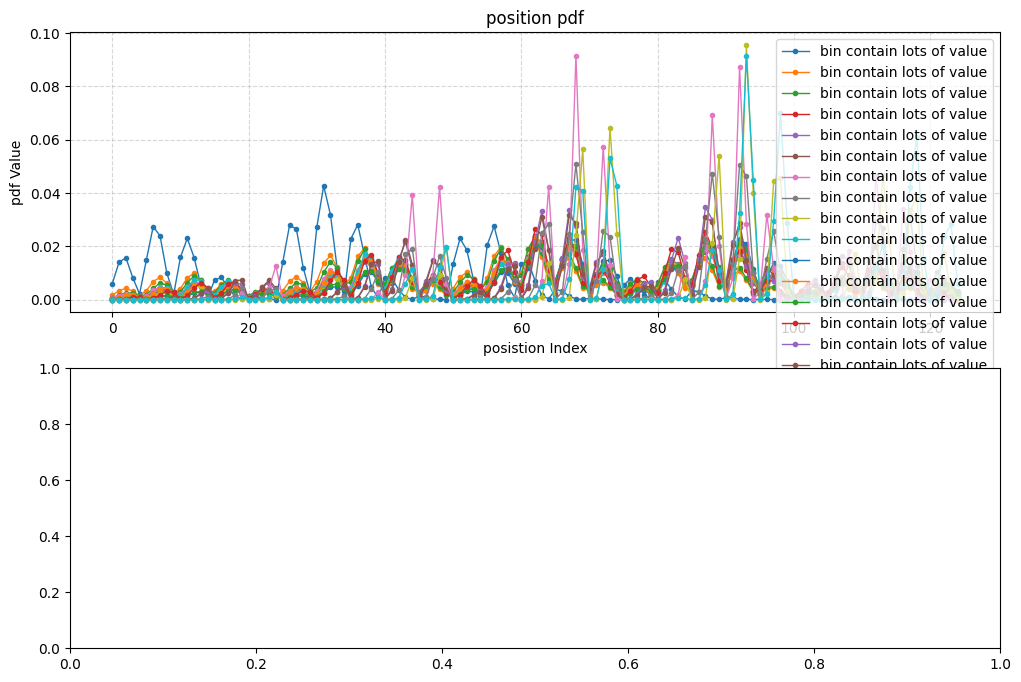

In [70]:
from scipy.stats import multivariate_normal
print(hist[46])
cov=phi_model.blocks[0].getCovMatirx(46)
mean=phi_model.blocks[0].getMean(46)
small_GM=multivariate_normal(mean=mean , cov=cov , allow_singular=True)
cov=phi_model.blocks[0].getCovMatirx(27)
mean=phi_model.blocks[0].getMean(27)
big_GM=multivariate_normal(mean=mean , cov=cov , allow_singular=True)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
for i in range(binsNumber):
    pdf=[]
    if  phi_model.blocks[0].getCountByBinNumber(i)<20:
        continue
    cov=phi_model.blocks[0].getCovMatirx(i)
    mean=phi_model.blocks[0].getMean(i)
    small_GM=multivariate_normal(mean=mean , cov=cov , allow_singular=True)
    for z in range(5):
        for y in range(5):
            for x in range(5):
                pdf.append(small_GM.pdf([z,y,x]))
            


    axes[0].plot(pdf, label=f"bin contain lots of value", marker='o', markersize=3, linewidth=1)

axes[0].set_title("position pdf")
axes[0].set_xlabel("posistion Index")
axes[0].set_ylabel("pdf Value")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

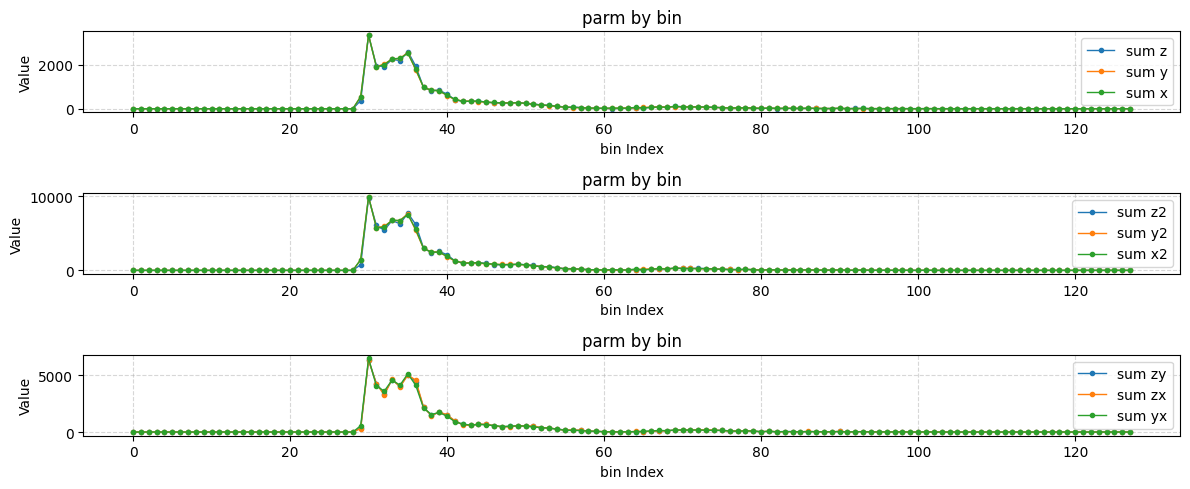

[np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(775.0), np.float32(9817.0), np.float32(6081.0), np.float32(5425.0), np.float32(6748.0), np.float32(6289.0), np.float32(7735.0), np.float32(6222.0), np.float32(3018.0), np.float32(2391.0), np.float32(2564.0), np.float32(2109.0), np.float32(1276.0), np.float32(989.0), np.float32(991.0), np.float32(1033.0), np.float32(941.0), np.float32(764.0), np.float32(754.0), np.float32(787.0), np.float32(826.0), np.float32(765.0), np.float32(703.0), np.float32(512.0), np.float32(495.0), np.float32(366.0),

In [84]:
sum_z=[]
sum_y=[]
sum_x=[]
sum_z2=[]
sum_y2=[]
sum_x2=[]
sum_zy=[]
sum_zx=[]
sum_yx=[]

for i in range(binsNumber):
    
    
    parm=phi_model.blocks[14].getParmByBinNumber(i)
    sum_z.append(parm[0])
    sum_y.append(parm[1])
    sum_x.append(parm[2])

    sum_z2.append(parm[3])
    sum_y2.append(parm[4])
    sum_x2.append(parm[5])

    sum_zy.append(parm[6])
    sum_zx.append(parm[7])
    sum_yx.append(parm[8])

fig, axes = plt.subplots(3, 1, figsize=(12, 5))
axes[0].plot(sum_z, label=f"sum z", marker='o', markersize=3, linewidth=1)
axes[0].plot(sum_y, label=f"sum y", marker='o', markersize=3, linewidth=1)
axes[0].plot(sum_x, label=f"sum x", marker='o', markersize=3, linewidth=1)

axes[0].set_title("parm by bin")
axes[0].set_xlabel("bin Index")
axes[0].set_ylabel("Value")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].plot(sum_z2, label=f"sum z2", marker='o', markersize=3, linewidth=1)
axes[1].plot(sum_y2, label=f"sum y2", marker='o', markersize=3, linewidth=1)
axes[1].plot(sum_x2, label=f"sum x2", marker='o', markersize=3, linewidth=1)

axes[1].set_title("parm by bin")
axes[1].set_xlabel("bin Index")
axes[1].set_ylabel("Value")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

axes[2].plot(sum_zy, label=f"sum zy", marker='o', markersize=3, linewidth=1)
axes[2].plot(sum_zx, label=f"sum zx", marker='o', markersize=3, linewidth=1)
axes[2].plot(sum_yx, label=f"sum yx", marker='o', markersize=3, linewidth=1)

axes[2].set_title("parm by bin")
axes[2].set_xlabel("bin Index")
axes[2].set_ylabel("Value")
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(sum_z2)
print(sum_y2)
print(sum_x2)

In [72]:
gtModel=multiHistogramBase.multiHistogramModel(all_ensamble_data,blockSize=1,binsNumber=binsNumber)
gtModel.fit()
multiBinEdges=gtModel.blocks[0].binEdges
oursError=[]
for z in range(5):
    for y in range(5):
        for x in range(5):
            gtSamples=gtModel.sampleByPos(z,y,x)
            gtMultiHist,_=np.histogramdd(gtSamples,bins=multiBinEdges)
            gtMultiHist=gtMultiHist/np.sum(gtMultiHist)

            ourHist=phi_model.getPointProb(z,y,x)

            rmse=np.sqrt(np.mean((gtMultiHist-ourHist)**2))
            oursError.append(rmse)

oursError=np.array(oursError)
print(f"ours error:{oursError.mean()}")

ours error:0.007443895566750725
